In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import scienceplots
from tueplots import fontsizes
plt.style.use(["science", "no-latex"])
from XrayTo3DShape import filter_wandb_run, get_run_from_model_name, MODEL_NAMES


/mnt/SSD0/mahesh-home/miniconda3/envs/xrayto3dbenchmark-cuda_11/lib/python3.8/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: /mnt/SSD0/mahesh-home/miniconda3/envs/xrayto3dbenchmark-cuda_11/lib/python3.8/site-packages/torchvision/image.so: undefined symbol: _ZN2at4_ops19empty_memory_format4callEN3c108ArrayRefIlEENS2_8optionalINS2_10ScalarTypeEEENS5_INS2_6LayoutEEENS5_INS2_6DeviceEEENS5_IbEENS5_INS2_12MemoryFormatEEE
  warn(f"Failed to load image Python extension: {e}")


In [2]:
fontsizes.neurips2022()

{'font.size': 9,
 'axes.labelsize': 9,
 'legend.fontsize': 7,
 'xtick.labelsize': 7,
 'ytick.labelsize': 7,
 'axes.titlesize': 9}

In [3]:
COLUMNS = ['ASIS_L','ASIS_R','PT_L','PT_R','IS_L','IS_R','PSIS_L','PSIS_R']
ROWS = ['DSC','NSD','ASD','HD95',]

In [4]:
generalized_metrics_template = "../runs/2d-3d-benchmark/{run_id}/evaluation/metric-log.csv"
clinical_parameters_template = "../runs/2d-3d-benchmark/{run_id}/evaluation/hip_landmark_error.csv"

In [5]:
ANATOMY='hip'
runs = filter_wandb_run(anatomy=ANATOMY, tags=['model-compare','dropout'])
model = MODEL_NAMES[1]
run = get_run_from_model_name(model,runs)
print(run.id, model)

762ji1eb UNETR


In [6]:
clinical_csv = pd.read_csv(clinical_parameters_template.format(run_id=run.id))
generalized_metric_csv = pd.read_csv(generalized_metrics_template.format(run_id=run.id))

In [7]:
generalized_metric_csv['id'] = generalized_metric_csv['subject-id'].str[:5]

In [8]:
merged_csv = pd.merge(clinical_csv,generalized_metric_csv,on='id',how='left')

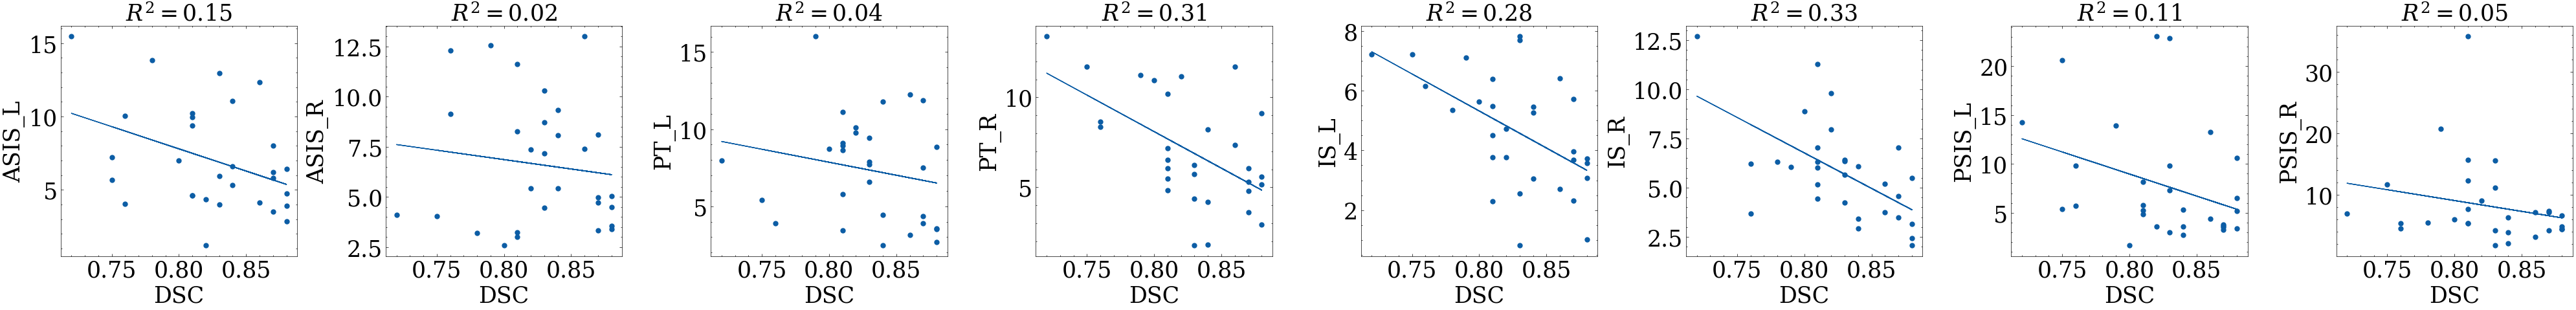

In [13]:
subplot_sz = 5
rows = 1
cols = len(COLUMNS)
fig, ax = plt.subplots(rows,cols,figsize=(cols*subplot_sz,rows*subplot_sz))
rw = 'DSC'
for clm_idx,clm in enumerate(COLUMNS):

    threshold = merged_csv[clm].quantile(0.90)
    merged_filtered_csv = merged_csv[merged_csv[clm] < threshold]
    # merged_filtered_csv = merged_csv

    dsc = merged_filtered_csv[rw]
    y = merged_filtered_csv[clm]

    regressor = LinearRegression().fit(dsc.values.reshape(-1,1),y.values)
    y_pred = regressor.predict(dsc.values.reshape(-1,1))
    r2 = r2_score(y,y_pred)

    ax[clm_idx].plot(dsc,y_pred)
    ax[clm_idx].scatter(dsc,y,s=subplot_sz*5)

    ax[clm_idx].set_title(r'$R^2={:.2f}$'.format(r2),fontsize=25)
    # ax[idx].xaxis.set_ticklabels([])
    # ax[idx].yaxis.set_ticklabels([])
    ax[clm_idx].set_xlabel(rw,fontsize=25)
    ax[clm_idx].set_ylabel(clm,fontsize=25)
    ax[clm_idx].xaxis.set_tick_params(labelsize=25)
    ax[clm_idx].yaxis.set_tick_params(labelsize=25)
plt.tight_layout()
plt.savefig('hip_dice_clinical_relationship_dsc.pdf')

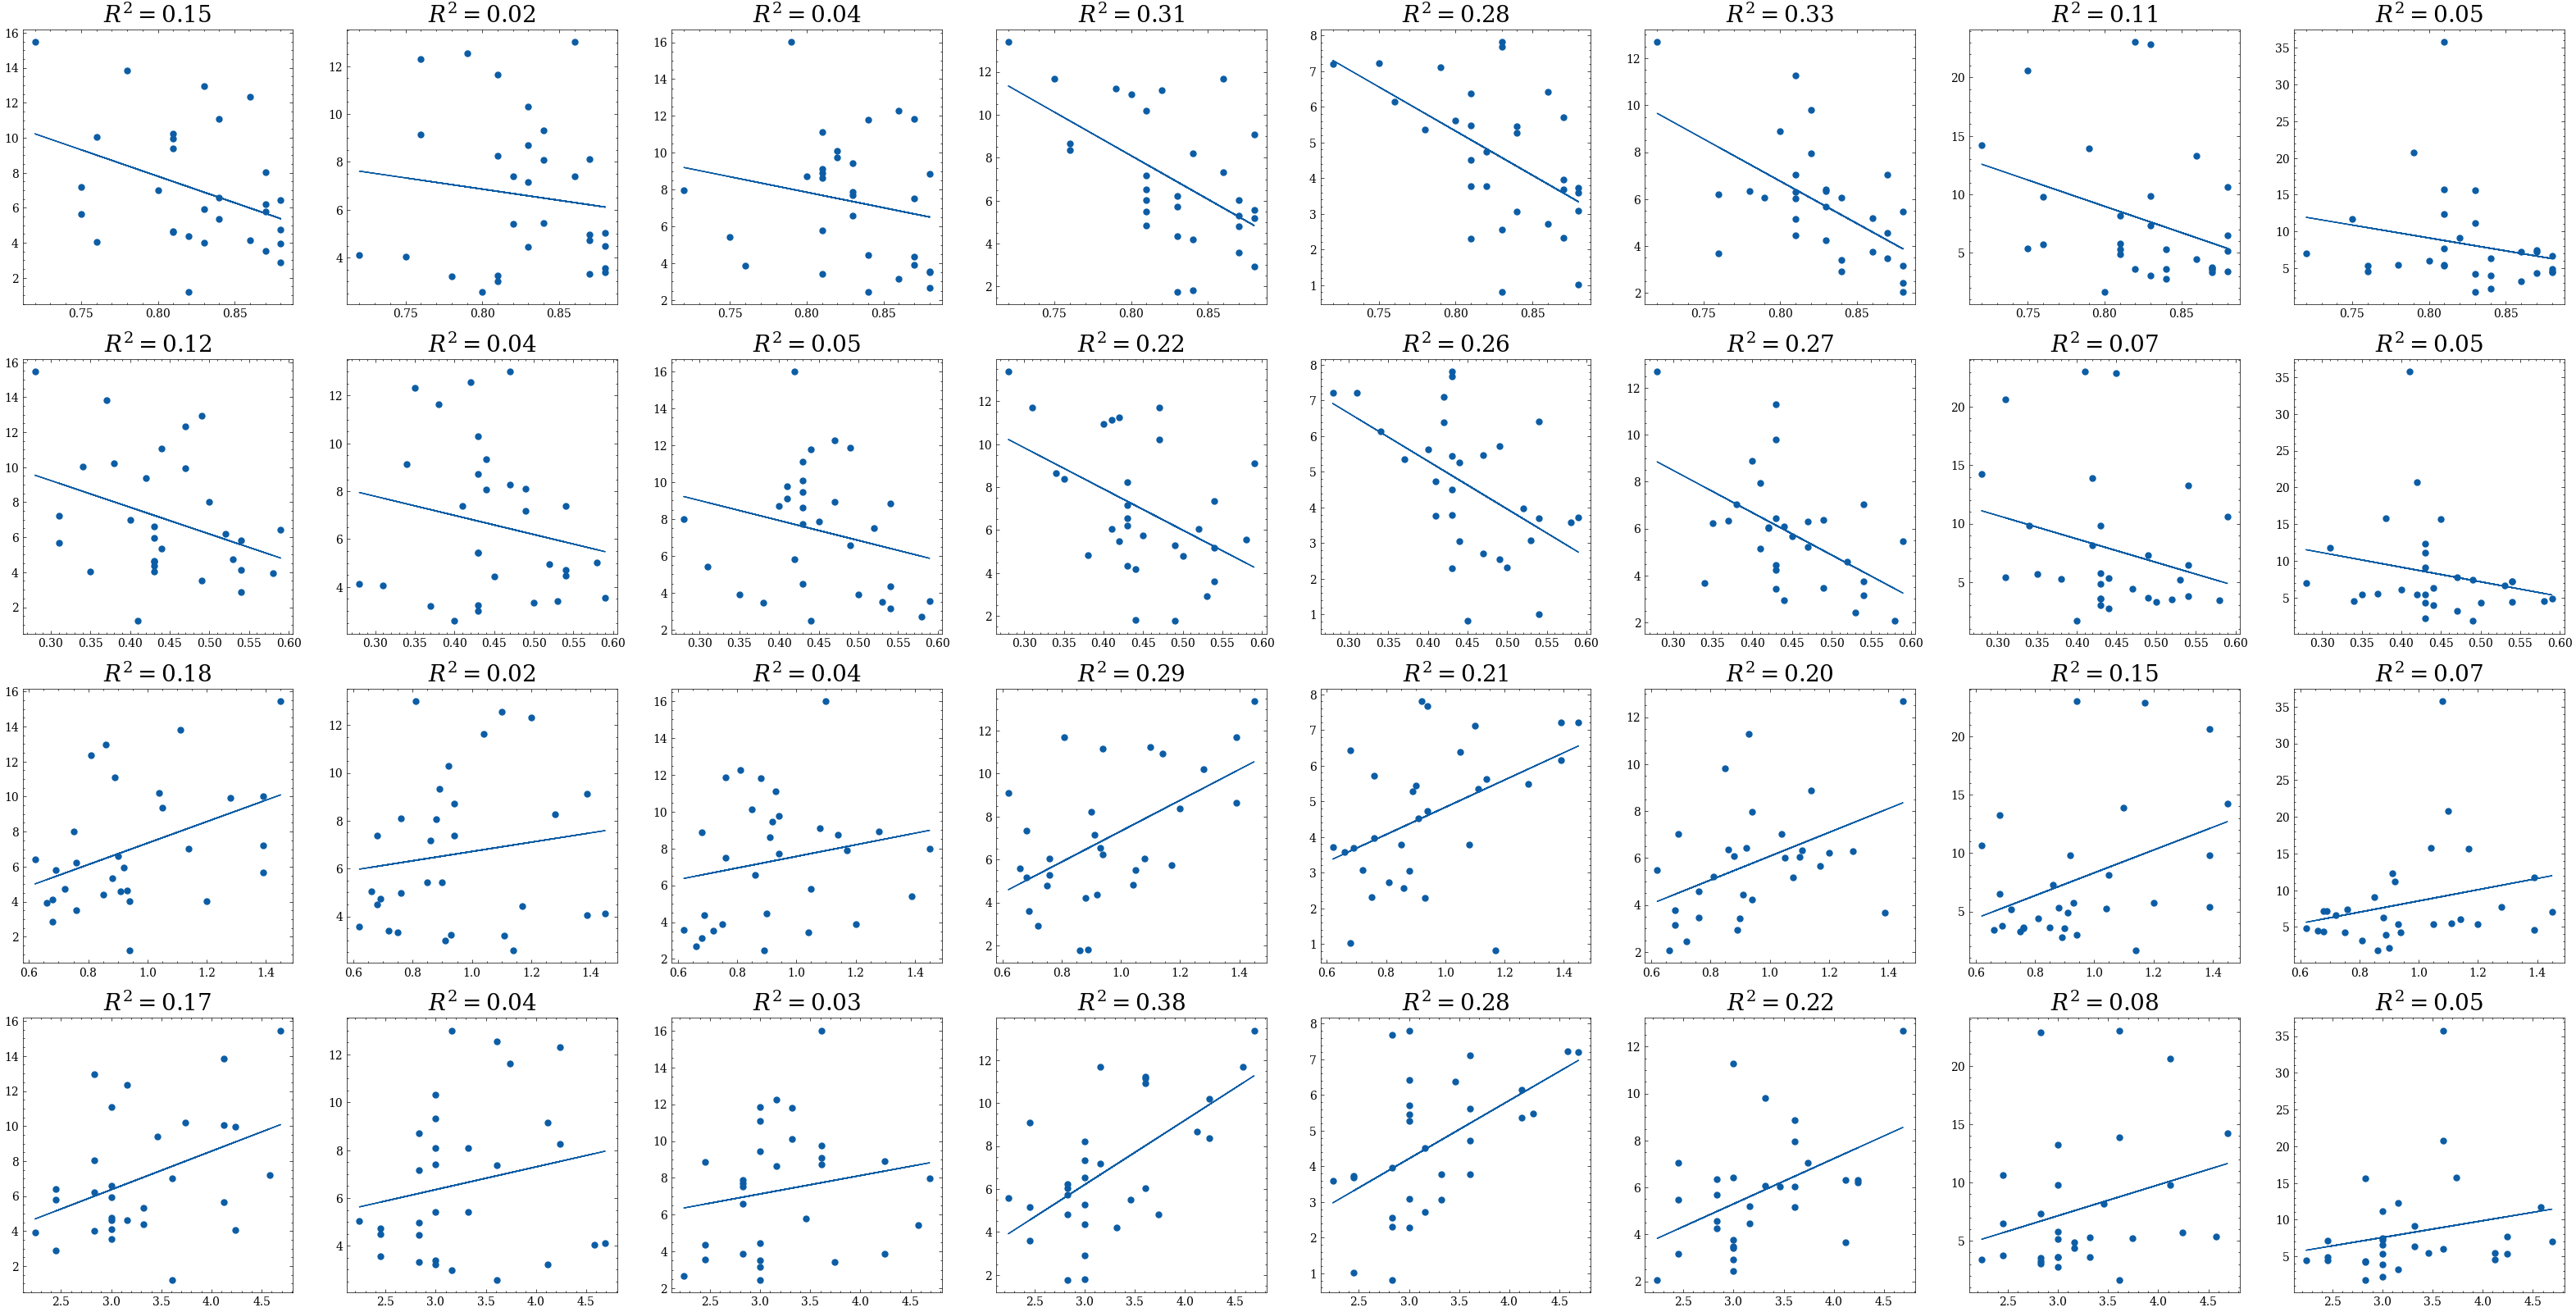

In [20]:
subplot_sz = 5
rows = len(ROWS)
cols = len(COLUMNS)
fig, ax = plt.subplots(rows,cols,figsize=(cols*subplot_sz,rows*subplot_sz))
for rw_idx, rw in enumerate(ROWS):
    for clm_idx,clm in enumerate(COLUMNS):

        threshold = merged_csv[clm].quantile(0.90)
        merged_filtered_csv = merged_csv[merged_csv[clm] < threshold]
        # merged_filtered_csv = merged_csv

        dsc = merged_filtered_csv[rw]
        y = merged_filtered_csv[clm]

        regressor = LinearRegression().fit(dsc.values.reshape(-1,1),y.values)
        y_pred = regressor.predict(dsc.values.reshape(-1,1))
        r2 = r2_score(y,y_pred)

        ax[rw_idx][clm_idx].plot(dsc,y_pred)
        ax[rw_idx][clm_idx].scatter(dsc,y,s=subplot_sz*5)

        ax[rw_idx][clm_idx].set_title(r'$R^2={:.2f}$'.format(r2),fontsize=20)
        # ax[idx].xaxis.set_ticklabels([])
        # ax[idx].yaxis.set_ticklabels([])
        # ax[rw_idx][clm_idx].set_xlabel(rw,fontsize=20)
        # ax[rw_idx][clm_idx].set_ylabel(clm,fontsize=20)
plt.savefig('hip_dice_clinical_relationship.pdf')

<Figure size 350x262.5 with 0 Axes>

In [9]:
clinical_csv.head(), generalized_metric_csv.head()

(      id  ASIS_L  ASIS_R    PT_L    PT_R    IS_L    IS_R  PSIS_L  PSIS_R
 0  s0232   5.946  10.300   9.451   4.355   7.813   6.427   9.820  11.159
 1  s0139   6.214   4.963   7.513   6.045   3.969   4.578   3.527  37.538
 2  s0182   4.019   8.707   7.716   6.223   7.682   4.242   3.030   4.242
 3  s0040   6.426   3.564   3.566   9.099   3.724   5.478  10.626   4.854
 4  s0049   5.662  14.952  17.837  83.457  28.812  26.529  20.621  74.908,
       subject-id   DSC   ASD  HD95   NSD     id
 0  s0624_hip_msk  0.88  0.68  2.45  0.54  s0624
 1  s0139_hip_msk  0.87  0.76  2.83  0.52  s0139
 2  s0232_hip_msk  0.83  0.92  3.00  0.43  s0232
 3  s0040_hip_msk  0.88  0.62  2.45  0.59  s0040
 4  s0473_hip_msk  0.79  1.10  3.61  0.42  s0473)